<h1>Data Analysis for compliance problems: a study of credit card default in the context of the Directive (EU) 2023/2225</h1>


## Introduction

The scope of new European Directive 2023/2255 encompasses deferred payments, with charges, of an existing debt. To demonstrate how Machine Learning models can help assess creditworthiness, we will use a database from code.datasciencedojo.com (available from:
https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Default%20of%20Credit%20Card%20Clients)

It comprises 30000 rows and 24 column and provides credit card default from April 2005 to September 2005. This dataset will be used for training purposes as part of the Postgraduate Certificate Capstone project.

The study does not aim to satisfy all requirements yet but only brings to light how :
- machine learning models can help predict customer default; and
- data-driven insights can help shape product policy.

The data set will undergo .
- duplicate checks, nan-values, data types;
- OnehotEncoding and OrdinalEncoding.
- StandardScaling
- Train-Test split
- Modelling (K-nn, DecisionTree, RandomForest, GridSearchCV)

### Results

#### Data munipulation

In [10018]:
import pandas as pd
import numpy as np

#### Data vizualization

In [10020]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Load the dataset

In [10022]:
url = r'C:\Users\emman\OneDrive\Bureau\Data Analytics\Default of Credit Card Clients\default of credit card clients.csv'

df = pd.read_csv(url)

In [10023]:
df.sample(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
8564,8564,20000,1,3,1,52,1,2,2,-2,...,0,0,0,0,0,0,0,0,0,1
17330,17330,200000,2,2,2,36,0,0,0,0,...,146190,148989,130481,5048,6726,5451,5774,4739,5500,0
13671,13671,320000,1,1,1,40,-1,-1,-1,-1,...,430,430,430,430,430,430,430,430,430,0
9725,9725,50000,1,1,1,38,0,0,-2,-2,...,0,0,0,0,0,0,0,0,0,0
9379,9379,350000,1,1,2,33,0,0,0,0,...,38575,34226,31026,2045,1660,1338,1300,2000,865,0
26338,26338,260000,2,2,1,42,0,0,0,0,...,27804,25809,27052,2500,3000,3000,2500,2500,2000,0
6005,6005,80000,2,3,1,33,0,0,0,0,...,48315,48831,48950,3373,7248,2980,2000,1903,1851,0
7717,7717,130000,2,2,1,43,0,0,0,0,...,97685,80733,82883,5008,6003,4000,3000,4870,3000,0
24813,24813,30000,1,3,1,42,0,0,-1,-1,...,390,390,0,1000,390,390,390,0,780,0
2841,2841,210000,2,2,2,32,-1,0,0,0,...,6504,326,89599,1526,4000,514,326,89599,3292,0


#### Data inspection

In [10025]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [10026]:
df.isna().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

#### Duplicate check

In [10028]:
df.duplicated().sum()

0

#### Column renaming for an easier reference

In [10030]:
column_mapping = {
    'Unnamed':'ID',
    'X1': 'LIMIT_BAL',
    'X2': 'SEX',
    'X3': 'EDUCATION',
    'X4': 'MARRIAGE',
    'X5': 'AGE',
    'X6': 'PAY_0',
    'X7': 'PAY_2',
    'X8': 'PAY_3',
    'X9': 'PAY_4',
    'X10': 'PAY_5',
    'X11': 'PAY_6',
    'X12': 'BILL_AMT1',
    'X13': 'BILL_AMT2',
    'X14': 'BILL_AMT3',
    'X15': 'BILL_AMT4',
    'X16': 'BILL_AMT5',
    'X17': 'BILL_AMT6',
    'X18': 'PAY_AMT1',
    'X19': 'PAY_AMT2',
    'X20': 'PAY_AMT3',
    'X21': 'PAY_AMT4',
    'X22': 'PAY_AMT5',
    'X23': 'PAY_AMT6',
    'Y': 'default_payment_next_month'
}
df.rename(columns=column_mapping, inplace=True)

## Part 1 : Exploratory Data Analysis

### Univariate Analysis

In [10033]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  30001 non-null  object
 1   LIMIT_BAL                   30001 non-null  object
 2   SEX                         30001 non-null  object
 3   EDUCATION                   30001 non-null  object
 4   MARRIAGE                    30001 non-null  object
 5   AGE                         30001 non-null  object
 6   PAY_0                       30001 non-null  object
 7   PAY_2                       30001 non-null  object
 8   PAY_3                       30001 non-null  object
 9   PAY_4                       30001 non-null  object
 10  PAY_5                       30001 non-null  object
 11  PAY_6                       30001 non-null  object
 12  BILL_AMT1                   30001 non-null  object
 13  BILL_AMT2                   30001 non-null  ob

##### The target variable

The column "default_payment_next_month" provides clients that defaulted on their payment with :
- value 1 = default
- value 0 = no default.

In [10035]:
df["default_payment_next_month"].value_counts()

default_payment_next_month
0                             23364
1                              6636
default payment next month        1
Name: count, dtype: int64

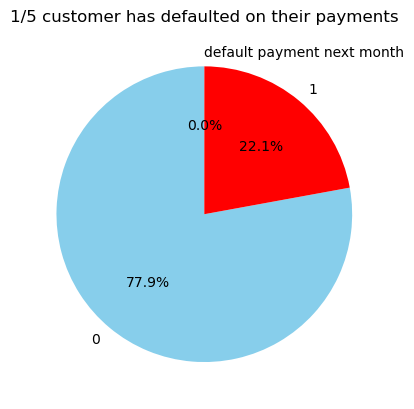

In [10036]:
# Plot pie chart with percentage labels
df["default_payment_next_month"].value_counts(normalize=True).plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=['skyblue', 'red'])

# Add title
plt.title("1/5 customer has defaulted on their payments")
plt.ylabel('')  # Optionally, remove the y-axis label for a cleaner look
plt.show()

In [10037]:
df.describe()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


### Bivariate Data Analysis

To generate a correlationheatmap, all columns expect catgeorical columns are selected, namely Sex, Education and Marriage.

In [10039]:
selected_columns = df[[
    'LIMIT_BAL',
    'PAY_0',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6', 
    'BILL_AMT1', 
    'BILL_AMT2', 
    'BILL_AMT3', 
    'BILL_AMT4', 
    'BILL_AMT5', 
    'BILL_AMT6', 
    'PAY_AMT1', 
    'PAY_AMT2', 
    'PAY_AMT3', 
    'PAY_AMT4', 
    'PAY_AMT5', 
    'PAY_AMT6', 
    'AGE', 
    'default_payment_next_month']]

In [10040]:
selected_columns = selected_columns.apply(pd.to_numeric, errors='coerce')

In [10041]:
corr = selected_columns.corr()

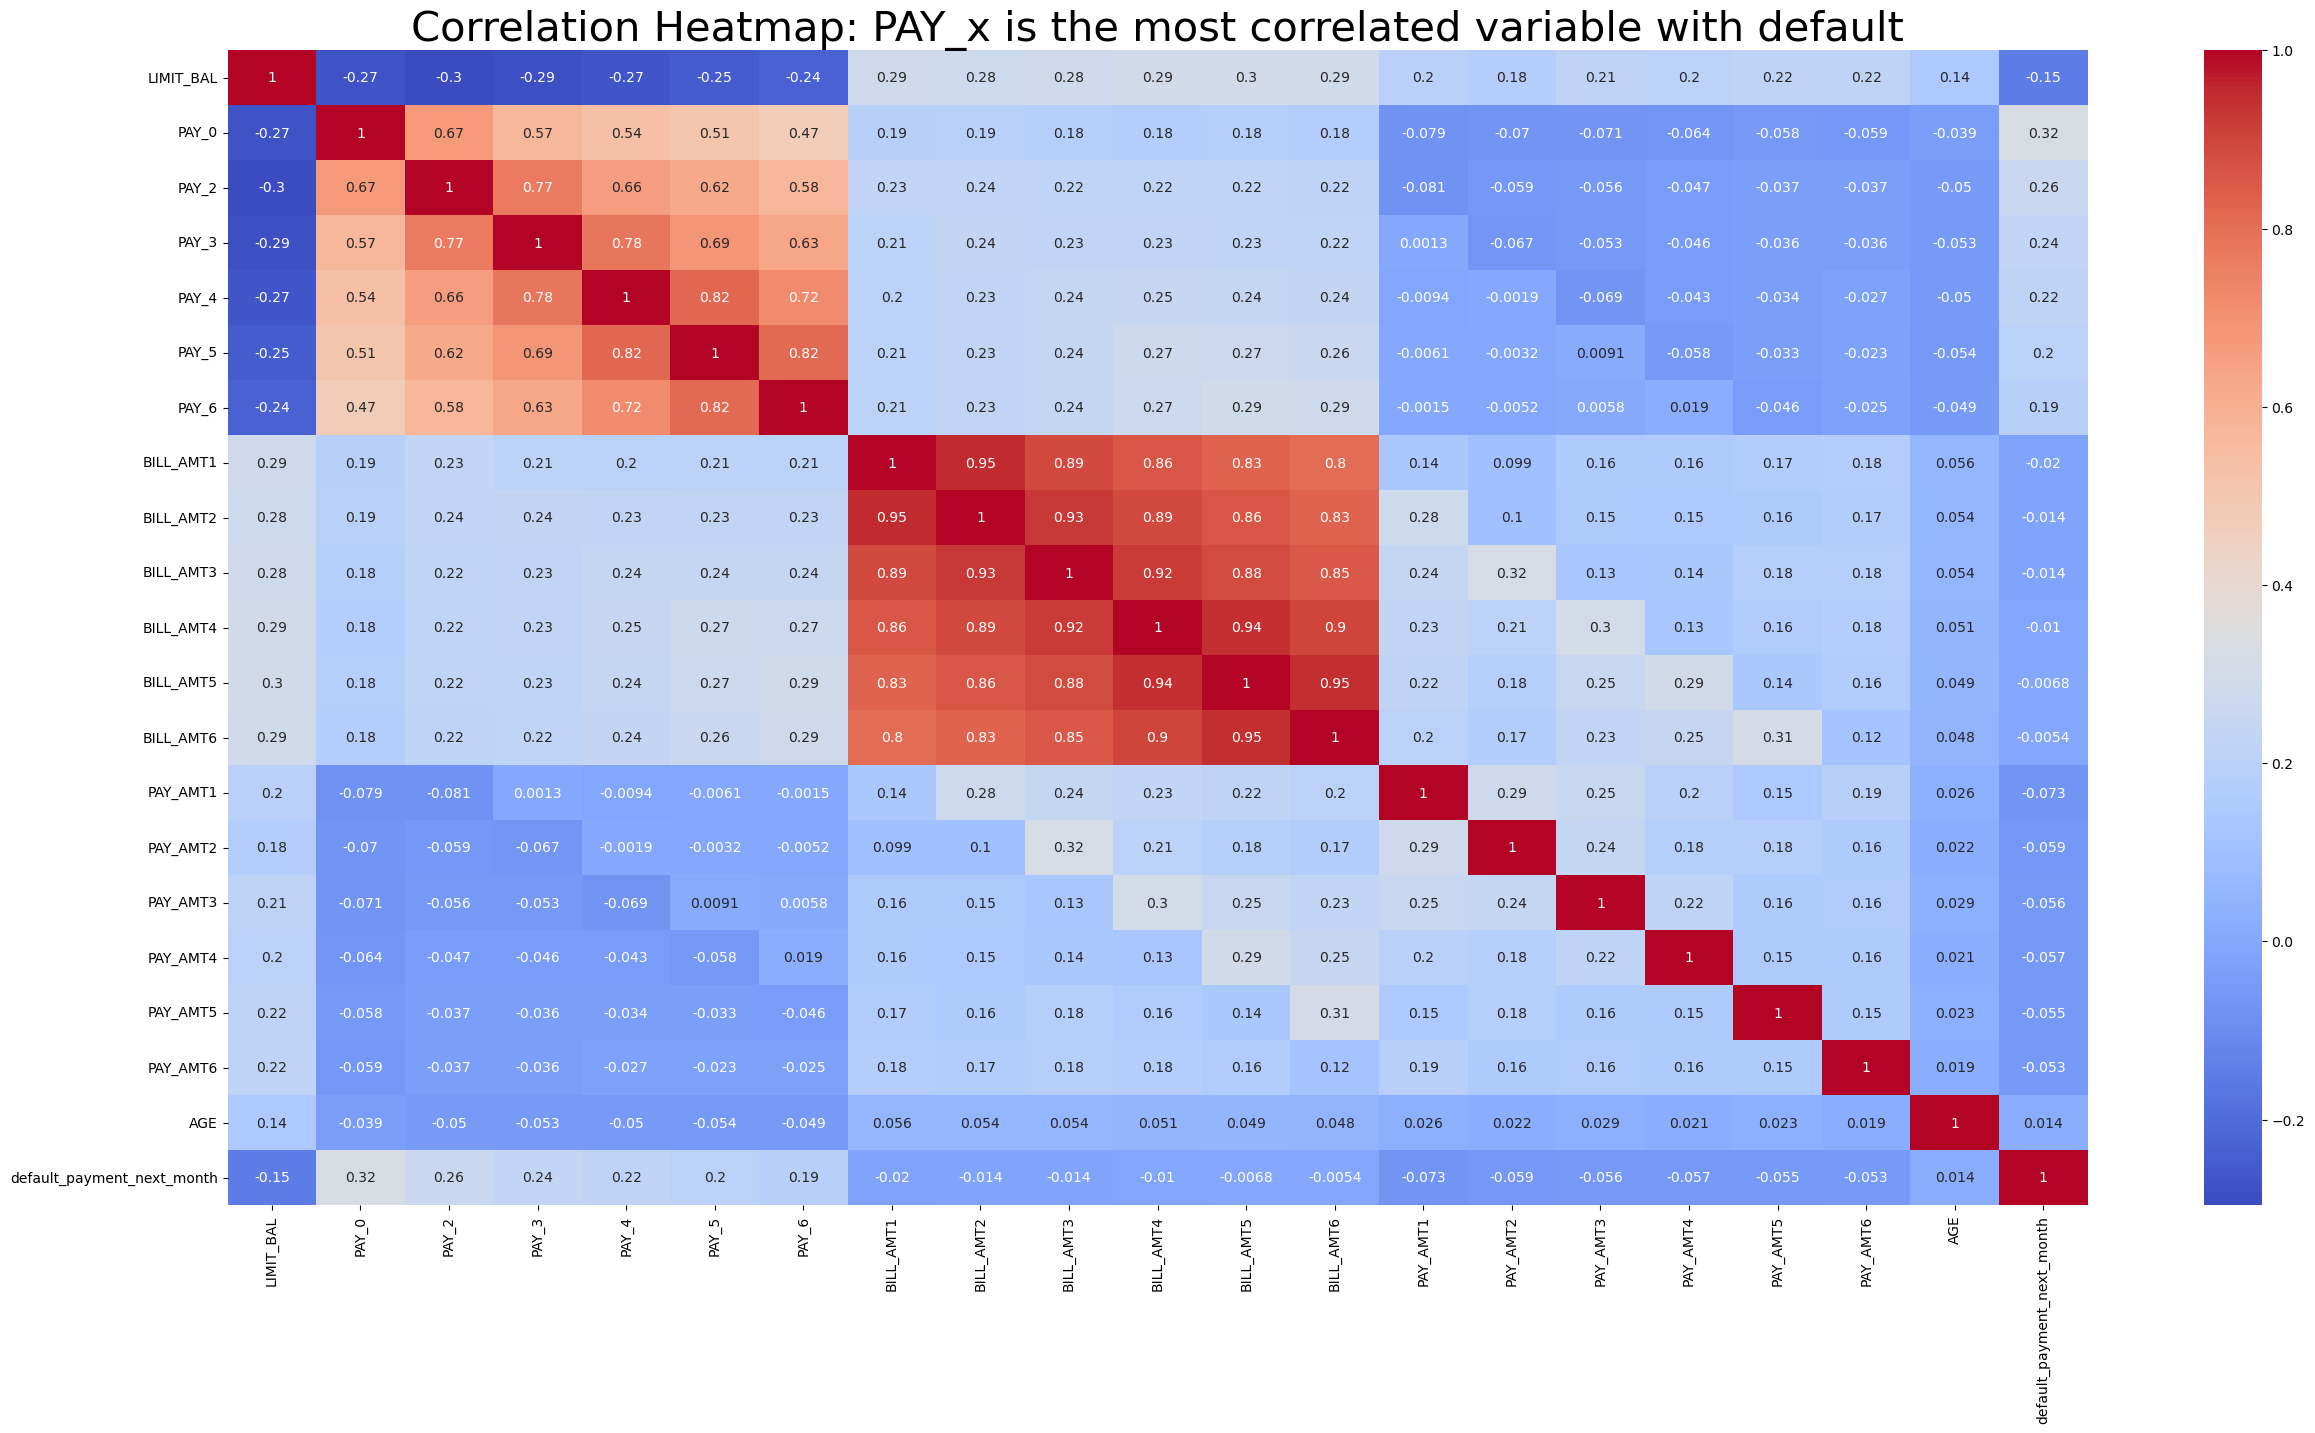

In [10042]:
plt.figure(figsize=(30, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: PAY_x is the most correlated variable with default', fontsize=30)
plt.show()

### EDA's insights 1/2
Based on the above heatmap.

It appears that:
- PAY_0 (being the history of repayement status as of September 2005) has the highest correlation with default with 0.32)
- LIMIT_BAL (which refers to the credit amount) is negatively correlated -0.15. Hence when the credit amount increases, the default rate decreases.

### PAY_0 Analysis and Heatmap

To better understand the relationship bewteen the variable PAY_0 and default_payment_next_month we will generate a second heatmap showing the PAY_x columns with their value by their average default rate.

Note: PAY_x refers to the repayment status in a given month (April-September).

In [10045]:
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [10046]:
repayment_statuses = [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

In [10047]:
# Create a DataFrame to store the average default rates
average_default_rates = pd.DataFrame(index=repayment_statuses, columns=pay_columns)

In [10048]:
# Check the unique values in each PAY_X column
for col in pay_columns:
    unique_values = df[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in PAY_0: ['PAY_0' '2' '-1' '0' '-2' '1' '3' '4' '8' '7' '5' '6']
Unique values in PAY_2: ['PAY_2' '2' '0' '-1' '-2' '3' '5' '7' '4' '1' '6' '8']
Unique values in PAY_3: ['PAY_3' '-1' '0' '2' '-2' '3' '4' '6' '7' '1' '5' '8']
Unique values in PAY_4: ['PAY_4' '-1' '0' '-2' '2' '3' '4' '5' '7' '6' '1' '8']
Unique values in PAY_5: ['PAY_5' '-2' '0' '-1' '2' '3' '5' '4' '7' '8' '6']
Unique values in PAY_6: ['PAY_6' '-2' '2' '0' '-1' '3' '6' '4' '7' '8' '5']


In [10049]:
# Check the unique values in the default_payment_next_month column
unique_defaults = df['default_payment_next_month'].unique()
print("Unique values in default_payment_next_month:", unique_defaults)

Unique values in default_payment_next_month: ['default payment next month' '1' '0']


In [10050]:
# Check the data types of the columns
print("Data types of PAY_X columns:\n", df[pay_columns].dtypes)
print("Data type of default_payment_next_month column:\n", df['default_payment_next_month'].dtype)

Data types of PAY_X columns:
 PAY_0    object
PAY_2    object
PAY_3    object
PAY_4    object
PAY_5    object
PAY_6    object
dtype: object
Data type of default_payment_next_month column:
 object


In [10051]:
# Remove string entries that match column names
for col in pay_columns:
    df[col] = df[col].replace(col, np.nan)

In [10052]:
# Convert PAY_X columns to numeric, coercing errors to NaN
for col in pay_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [10053]:
# Convert default_payment_next_month to numeric, coercing errors to NaN
df['default_payment_next_month'] = df['default_payment_next_month'].replace('default payment next month', np.nan)
df['default_payment_next_month'] = pd.to_numeric(df['default_payment_next_month'], errors='coerce')

# Fill NaN values with a default value (e.g., 0) before converting the columns to integers
df[pay_columns] = df[pay_columns].fillna(0).astype(int)
df['default_payment_next_month'] = df['default_payment_next_month'].fillna(0).astype(int)

# Verify the conversion
print("Data types of PAY_X columns:\n", df[pay_columns].dtypes)
print("Data type of default_payment_next_month column:\n", df['default_payment_next_month'].dtype)

Data types of PAY_X columns:
 PAY_0    int32
PAY_2    int32
PAY_3    int32
PAY_4    int32
PAY_5    int32
PAY_6    int32
dtype: object
Data type of default_payment_next_month column:
 int32


In [10054]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the repayment statuses
repayment_statuses = [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

# Create a DataFrame to store the average default rates
average_default_rates = pd.DataFrame(index=repayment_statuses, columns=pay_columns)

# Calculate the average default rate for each PAY_X category by PAY_X value
for column in pay_columns:
    for status in repayment_statuses:
        subset = df[df[column] == status]
        if not subset.empty:
            average_default_rates.loc[status, column] = subset['default_payment_next_month'].mean()
            print(f"Subset for {column} with status {status} has {len(subset)} entries.")  # Debugging output
        else:
            print(f"No entries found for {column} with status {status}.")  # Debugging output

Subset for PAY_0 with status -2 has 2759 entries.
Subset for PAY_0 with status -1 has 5686 entries.
Subset for PAY_0 with status 0 has 14738 entries.
Subset for PAY_0 with status 1 has 3688 entries.
Subset for PAY_0 with status 2 has 2667 entries.
Subset for PAY_0 with status 3 has 322 entries.
Subset for PAY_0 with status 4 has 76 entries.
Subset for PAY_0 with status 5 has 26 entries.
Subset for PAY_0 with status 6 has 11 entries.
Subset for PAY_0 with status 7 has 9 entries.
Subset for PAY_0 with status 8 has 19 entries.
Subset for PAY_2 with status -2 has 3782 entries.
Subset for PAY_2 with status -1 has 6050 entries.
Subset for PAY_2 with status 0 has 15731 entries.
Subset for PAY_2 with status 1 has 28 entries.
Subset for PAY_2 with status 2 has 3927 entries.
Subset for PAY_2 with status 3 has 326 entries.
Subset for PAY_2 with status 4 has 99 entries.
Subset for PAY_2 with status 5 has 25 entries.
Subset for PAY_2 with status 6 has 12 entries.
Subset for PAY_2 with status 7 has 

In [10055]:
# Ensure the DataFrame contains only numeric values
average_default_rates = average_default_rates.apply(pd.to_numeric, errors='coerce')

# Display the table
print("Average Default Rates by PAY_X Category and Value:\n", average_default_rates)

Average Default Rates by PAY_X Category and Value:
        PAY_0     PAY_2     PAY_3     PAY_4     PAY_5     PAY_6
-2  0.132294  0.182708  0.185312  0.192502  0.196876  0.200409
-1  0.167781  0.159669  0.155945  0.158959  0.161943  0.169861
 0  0.128104  0.159113  0.174500  0.183277  0.188518  0.188432
 1  0.339479  0.178571  0.250000  0.500000       NaN       NaN
 2  0.691414  0.556150  0.515580  0.523267  0.541889  0.506508
 3  0.757764  0.616564  0.575000  0.611111  0.634831  0.641304
 4  0.684211  0.505051  0.578947  0.666667  0.607143  0.632653
 5  0.500000  0.600000  0.571429  0.514286  0.588235  0.538462
 6  0.545455  0.750000  0.608696  0.400000  0.750000  0.736842
 7  0.777778  0.600000  0.814815  0.827586  0.827586  0.826087
 8  0.578947  0.000000  0.666667  0.500000  1.000000  1.000000


In [10056]:
# Check for any non-numeric values
print("Data types in average_default_rates:\n", average_default_rates.dtypes)

Data types in average_default_rates:
 PAY_0    float64
PAY_2    float64
PAY_3    float64
PAY_4    float64
PAY_5    float64
PAY_6    float64
dtype: object


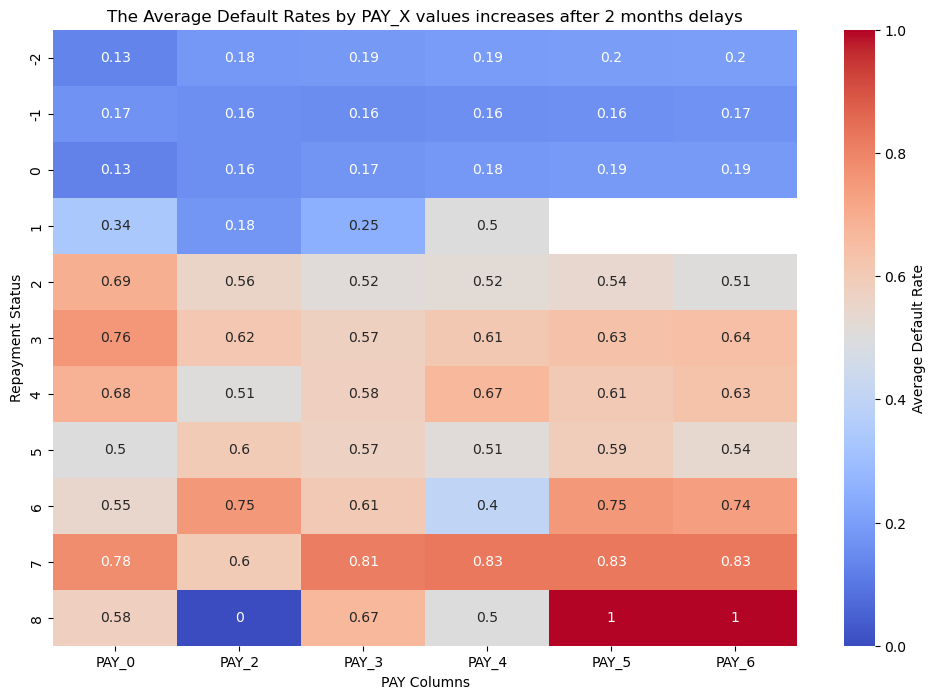

In [10057]:
# Visualize the table using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(average_default_rates, annot=True, cmap='coolwarm', cbar_kws={'label': 'Average Default Rate'})
plt.title('The Average Default Rates by PAY_X values increases after 2 months delays')
plt.xlabel('PAY Columns')
plt.ylabel('Repayment Status')
plt.show()

In [10058]:
# Check if the average default rate for PAY_5 and PAY_6 with value 8 is 1
pay_5_value_8 = df[df['PAY_5'] == 8]['default_payment_next_month']
pay_6_value_8 = df[df['PAY_6'] == 8]['default_payment_next_month']

In [10059]:
# Calculate the average default rate for PAY_5 and PAY_6 with value 8
average_default_rate_pay_5 = pay_5_value_8.mean() if not pay_5_value_8.empty else None
average_default_rate_pay_6 = pay_6_value_8.mean() if not pay_6_value_8.empty else None

print(f"Average default rate for PAY_5 with value 8: {average_default_rate_pay_5}")
print(f"Average default rate for PAY_6 with value 8: {average_default_rate_pay_6}")

Average default rate for PAY_5 with value 8: 1.0
Average default rate for PAY_6 with value 8: 1.0


### Interpretation notice
The above heat map show the average default rate for each value in the PAY_x column. However for (PAY_5 vaue =8 and PAY_6 value = 8), the proportaion is calculated with few entries, namely 1 en 2.

### EDA insights 2/2 - Repayment statuses (PAY_X)

At the begining of the monitoring period (April and May 2005 respectively PAY_6 and PAY_5):
- payments delayed by 6 months or more result in a default at least 74% of times.

At the end of the monitoring period (September 2025, PAY_0):
- payment delays between 2 and 4 months result in a default >= 68% of times.

For all monitoring periods:
- payment delays >= 7 months result in defaults >= 60% of times and up to 83%.

To design the product policy, those insights can translate into:
- a threshold for maximum authorised delayed payments of 6 months.
- an in-app notification at the end of the monitoring period for payments delays of 2-4 months.

Those are example of how data-driven insights can shape the product policy.

#### Categorical values (SEX column)

This column will be encoded with OneHotEncoder for it te be ready for the modelling. We will also plot the column to have an idea of the default rate by gender.

In [10063]:
from sklearn.preprocessing import OneHotEncoder

In [10064]:
# One-Hot Encode the 'SEX' column

onehotencoder = OneHotEncoder()
sex_encoded = onehotencoder.fit_transform(df[['SEX']]).toarray()
sex_encoded_df = pd.DataFrame(sex_encoded, columns=onehotencoder.get_feature_names_out(['SEX']))

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, sex_encoded_df], axis=1).drop(['SEX'], axis=1)

print(df.columns)
print(df[['SEX_1', 'SEX_2']].head())
print("NaN values in SEX_1 column:", df['SEX_1'].isna().sum())
print("NaN values in SEX_2 column:", df['SEX_2'].isna().sum())

Index(['Unnamed: 0', 'LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month', 'SEX_1', 'SEX_2', 'SEX_SEX'],
      dtype='object')
   SEX_1  SEX_2
0    0.0    0.0
1    0.0    1.0
2    0.0    1.0
3    0.0    1.0
4    0.0    1.0
NaN values in SEX_1 column: 0
NaN values in SEX_2 column: 0


In [10065]:
# Grouping by one-hot encoded SEX columns and default_payment_next_month
gender_default_male = df[df['SEX_1'] == 1].groupby('default_payment_next_month').size()
gender_default_female = df[df['SEX_2'] == 1].groupby('default_payment_next_month').size()

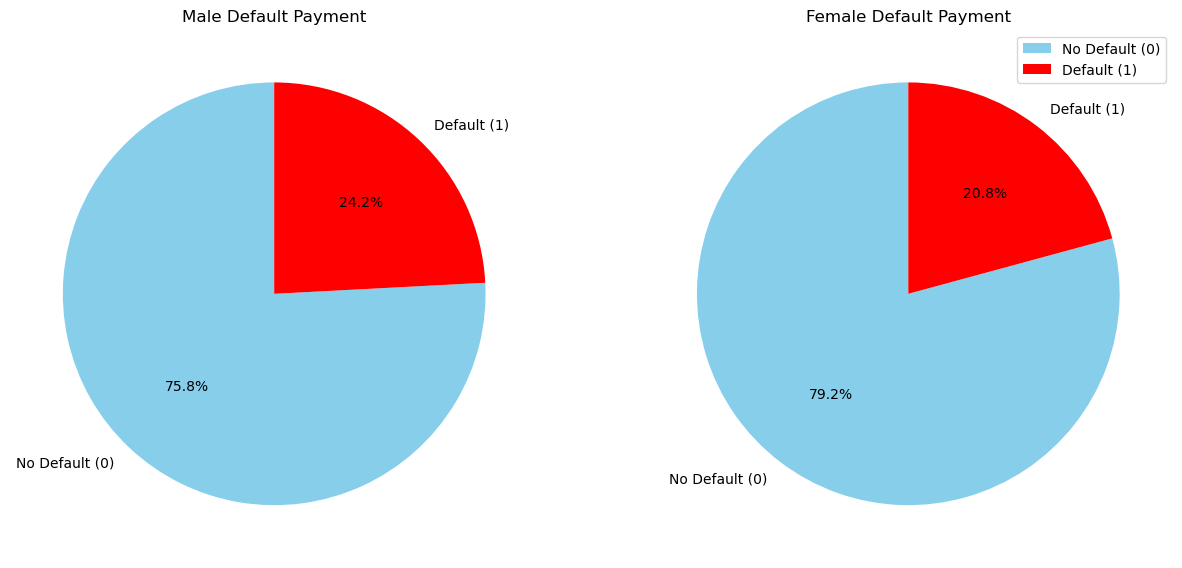

In [10066]:
# Plot pie charts
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Pie chart for Male (SEX_1)
labels_male = ['No Default (0)', 'Default (1)']
sizes_male = [gender_default_male.get(0, 0), gender_default_male.get(1, 0)]
axes[0].pie(sizes_male, labels=labels_male, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'red'])
axes[0].set_title('Male Default Payment')

# Pie chart for Female (SEX_2)
labels_female = ['No Default (0)', 'Default (1)']
sizes_female = [gender_default_female.get(0, 0), gender_default_female.get(1, 0)]
axes[1].pie(sizes_female, labels=labels_female, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'red'])
axes[1].set_title('Female Default Payment')

plt.legend(labels=['No Default (0)', 'Default (1)'], loc='upper right')
plt.show()

### Interpretation notice

Male defautl rate is slighlty higher (24.2%) than the female default rate (20.8%). 

There is no need to dive further as no product policy could be drafted in a way that it would overtly discriminate against a gender.

#### Categorical values (Education column)

This column will be encoded with OrdinalEncoder for it te be ready for the modelling part. We will also plot the column to have an idea of the default rate by education level.

In [10069]:
df["EDUCATION"].value_counts()

EDUCATION
2            14030
1            10585
3             4917
5              280
4              123
6               51
0               14
EDUCATION        1
Name: count, dtype: int64

In [10070]:
# Convert the EDUCATION column to numeric, coercing errors to NaN
df['EDUCATION'] = pd.to_numeric(df['EDUCATION'], errors='coerce')

In [10071]:
# Drop rows where education level is not 1, 2, 3, or 4
df = df[df['EDUCATION'].isin([1, 2, 3, 4])]

In [10072]:
# Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[[1, 2, 3, 4]])
df['EDUCATION'] = ordinal_encoder.fit_transform(df[['EDUCATION']])

In [10073]:
# Mapping encoded education levels to meaningful labels
education_labels = {0: 'Graduate', 1: 'University', 2: 'High School', 3: 'Others'}

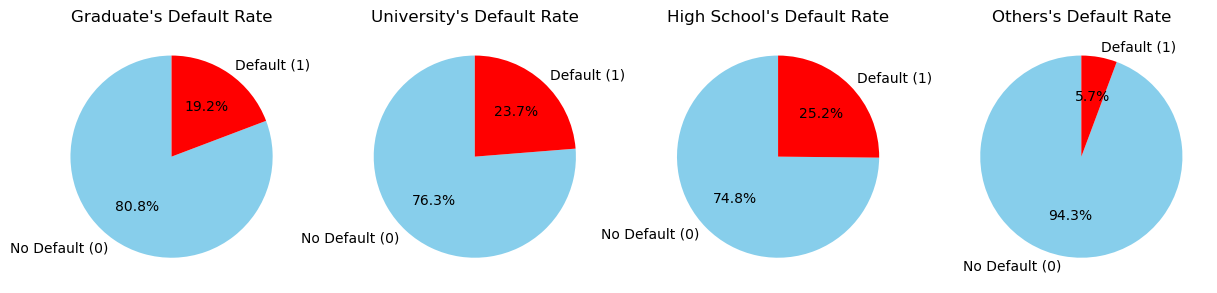

In [10074]:
# Plot pie charts
fig, axes = plt.subplots(1, len(education_labels), figsize=(15, 7))

for i, (education_level, label) in enumerate(education_labels.items()):
    grouped_data = df[df['EDUCATION'] == education_level].groupby('default_payment_next_month').size()

    # Pie chart for each education level
    labels = ['No Default (0)', 'Default (1)']
    sizes = [grouped_data.get(0, 0), grouped_data.get(1, 0)]
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'red'])
    axes[i].set_title(f"{label}'s Default Rate")

### Interpretation notice

The abve pie chart provides default rates by Education levels.

Default rates vary sharply bewteen 5.7% to 25.2% with High School (EDUCATION =2) being the highest and others (EDUCATION =3) being the lowest. 

As the default rate is not linear with the level of education, we can discount product policies suggestions solely based on the client Education level to address default rates. Also a more granular dataset would be required to have a breakup by field of studies.


### Categorical values (Marriage)

The 'MARRIAGE' column has 3 possibles values reffering to (1 = married; 2 = single; 3 = others). A priori, this does not provide a lot granularity to understand how the household is structure. We will nonetheless generate two pie chart to have an idea of the variable impact. 

In [10077]:
df["MARRIAGE"].value_counts()

MARRIAGE
2    15806
1    13477
3      318
0       54
Name: count, dtype: int64

In [10078]:
df['MARRIAGE'] = pd.to_numeric(df['MARRIAGE'], errors='coerce')
df['default_payment_next_month'] = pd.to_numeric(df['default_payment_next_month'], errors='coerce')

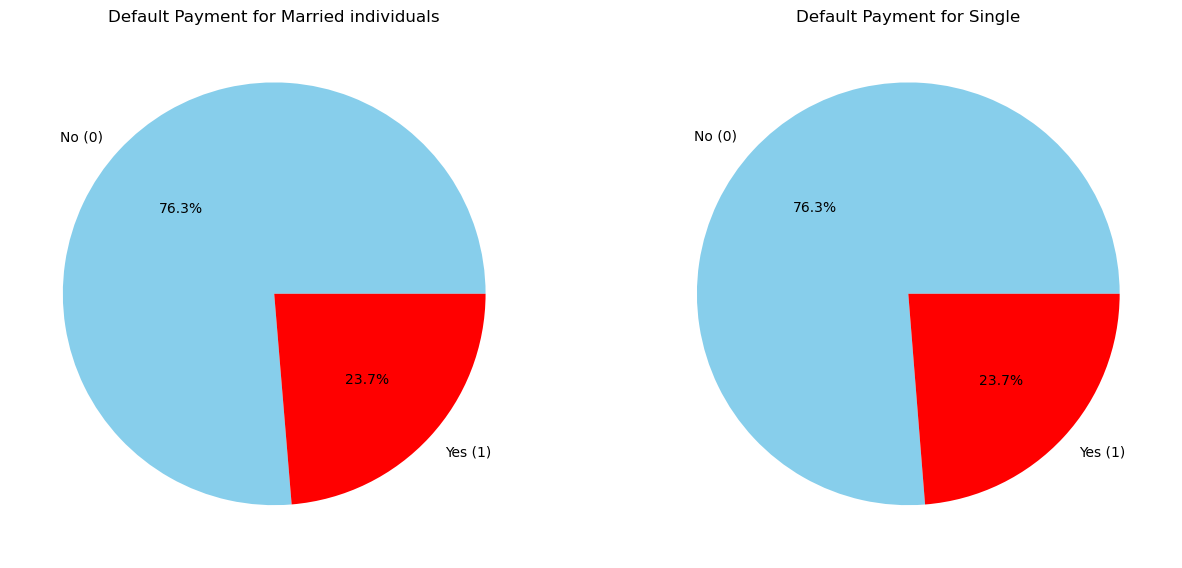

In [10079]:
# Let's convert to percentage instead of nominal values.
# Create a pie chart
# Groupping df by column MARRIAGE and default_payment_next_month
#size() function counts the number of occurences for each combination of MARRIAGE and default_payment_next_month
#unstack() function pivots the default_payment_next_month levels to columns, resulting in a dataframe where the rows represent education and the columns represent default_payment_next_month
marriage_default = df.groupby(['MARRIAGE', 'default_payment_next_month']).size().unstack()

#percentage of default for each MARRIAGE status.
#marriage_default.sum(axis=1) calculates the sum of each value of a given marriage status.
#marriage_default.div(....,axis=0) divides each element in marriage_default by the corresponding row sum, resulting in the proportion of defaults for each marriage levels.
marriage_default_percentage = marriage_default.div(marriage_default.sum(axis=1), axis=0) * 100

# Plot pie charts
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
axes[0].pie(marriage_default_percentage.loc[1], labels=['No (0)', 'Yes (1)'], autopct='%1.1f%%', colors=['skyblue', 'red'])
axes[0].set_title('Default Payment for Married individuals')
axes[1].pie(education_default_percentage.loc[2], labels=['No (0)', 'Yes (1)'], autopct='%1.1f%%', colors=['skyblue', 'red'])
axes[1].set_title('Default Payment for Single')
plt.show()

## Data Preparation for Modelling

In this section, we will ensure that:
- categorical cata are correctly encoded
- non numerical values have been dropped
- split the dataset in two parts (the train dataset and the test dataset)

In [10081]:
marriage_mapping = {1: 'Married', 2: 'Single', 3: 'Others'}
df['MARRIAGE'] = df['MARRIAGE'].map(marriage_mapping)

In [10082]:
#OneHotEncoding for MARRIAGE
onehotencoder = OneHotEncoder()
marriage_encoded = onehotencoder.fit_transform(df[['MARRIAGE']]).toarray()
marriage_encoded_df = pd.DataFrame(marriage_encoded, columns=onehotencoder.get_feature_names_out(['MARRIAGE']))

In [10083]:
# Concatenate the original DataFrame with the encoded columns and drop the original MARRIAGE column
df = pd.concat([df, marriage_encoded_df], axis=1).drop(['MARRIAGE'], axis=1)

In [10084]:
#PRINT LIMIT_BALL
print(df['LIMIT_BAL'].unique())

['20000' '120000' '90000' '50000' '500000' '100000' '140000' '200000'
 '260000' '630000' '70000' '250000' '320000' '360000' '180000' '130000'
 '450000' '60000' '230000' '160000' '280000' '10000' '40000' '210000'
 '380000' '310000' '150000' '400000' '80000' '290000' '340000' '300000'
 '30000' '240000' '470000' '480000' '350000' '330000' '110000' '420000'
 '170000' '370000' '270000' '220000' '190000' '510000' '460000' '440000'
 '490000' '390000' '580000' '600000' '410000' '620000' '610000' '700000'
 '670000' '680000' '430000' '550000' '540000' '1000000' '530000' '710000'
 '560000' '520000' '750000' '640000' '16000' '570000' '590000' '660000'
 '720000' '327680' '740000' '800000' '760000' '690000' '650000' '780000'
 '730000' nan]


In [10085]:
# Remove the header row from LIMIT_BAL column
df = df[df['LIMIT_BAL'] != 'LIMIT_BAL']

In [10086]:
# Convert LIMIT_BAL to float
df['LIMIT_BAL'] = df['LIMIT_BAL'].astype(float)

In [10087]:
print(df['LIMIT_BAL'].unique())

[  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  380000.  310000.  150000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  490000.  390000.  580000.  600000.  410000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.      nan]


In [10088]:
# Display the first few rows(df.head()) of the updated dataframe to make sure that I did not convert or remove anyting my mistake
display(df.head())

,Unnamed: 0,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,default_payment_next_month,SEX_1,SEX_2,SEX_SEX,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single,MARRIAGE_nan
1,1,20000.0,1.0,24,2.0,2.0,-1.0,-1.0,-2.0,-2.0,...,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,120000.0,1.0,26,-1.0,2.0,0.0,0.0,0.0,2.0,...,0,2000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,90000.0,1.0,34,0.0,0.0,0.0,0.0,0.0,0.0,...,1000,5000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,4,50000.0,1.0,37,0.0,0.0,0.0,0.0,0.0,0.0,...,1069,1000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,5,50000.0,1.0,57,-1.0,0.0,-1.0,0.0,0.0,0.0,...,689,679,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Train - Test Split

In [10090]:
from sklearn.model_selection import train_test_split

In [10091]:
df=df.dropna()

In [10092]:
print(df.isnull().sum())

Unnamed: 0                    0
LIMIT_BAL                     0
EDUCATION                     0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
SEX_1                         0
SEX_2                         0
SEX_SEX                       0
MARRIAGE_Married              0
MARRIAGE_Others               0
MARRIAGE_Single               0
MARRIAGE_nan                  0
dtype: int64


In [10093]:
X = df.drop(columns='default_payment_next_month')
y= df['default_payment_next_month']

In [10094]:
print(y.isnull().sum())

0


In [10095]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [10096]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("\n")
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (23451, 29)
y_train: (23451,)


x_test: (5863, 29)
y_test: (5863,)


In [10097]:
display(x_train.head())
display(y_train.head())

,Unnamed: 0,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,SEX_SEX,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single,MARRIAGE_nan
13985,13985,150000.0,0.0,40,0.0,0.0,0.0,0.0,0.0,0.0,...,4918,9000,5104,0.0,1.0,0.0,0.0,0.0,1.0,0.0
17765,17765,50000.0,2.0,52,0.0,0.0,0.0,0.0,0.0,-1.0,...,10,390,390,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2949,2949,150000.0,0.0,31,0.0,0.0,0.0,0.0,0.0,0.0,...,5000,5000,10000,0.0,1.0,0.0,1.0,0.0,0.0,0.0
17497,17497,80000.0,1.0,28,2.0,0.0,0.0,0.0,0.0,0.0,...,4,21,220,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2447,2447,80000.0,1.0,44,0.0,0.0,0.0,-1.0,-1.0,-1.0,...,15365,2250,2690,0.0,1.0,0.0,1.0,0.0,0.0,0.0


13985    0.0
17765    0.0
2949     0.0
17497    1.0
2447     0.0
Name: default_payment_next_month, dtype: float64

### Standard Scaling

In [10098]:
#StandardScaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)


In [10099]:
x_test_scaled = scaler.transform(x_test)

## Model building

In this section multiple Machine Learning methods will be tested against a Dummy Classifer. The best performing model will then be hypertuned for further improvements.

In the previous section the dataset has been split in a train dataset and a test dataset. This allows for models to be tested against seen data (train dataset) and unseen data (test data set). Each model has two results, a train and a test accuracy score.

### Dummy Classifier

In [10102]:
from sklearn.dummy import DummyClassifier

In [10103]:
dummy = DummyClassifier()

In [10104]:
dummy.fit(x_train_scaled, y_train)

DummyClassifier()

In [10105]:
print("The accuracy score of the model for Train is {:.2f}".format(dummy.score(x_train_scaled, y_train)))

The accuracy score of the model for Train is 0.78


In [10106]:
print("The accuracy score of the model for Test is {:.2f}".format(dummy.score(x_test_scaled, y_test)))

The accuracy score of the model for Test is 0.78


### K-Nearest Neighboor

In [10108]:
from sklearn.neighbors import KNeighborsClassifier

In [10109]:
knn = KNeighborsClassifier()

# fit the model 
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [10110]:
train_predictions = knn.predict(x_train)

In [10111]:
print("The accuracy score of the model for Train is {:.2f}".format(knn.score(x_train_scaled, y_train)))

The accuracy score of the model for Train is 0.84


In [10112]:
print("The accuracy score of the model for test is {:.2f}".format(knn.score(x_test_scaled, y_test)))

The accuracy score of the model for test is 0.79


### Decision Tree

In [10114]:
from sklearn.tree import DecisionTreeClassifier

In [10115]:
dt = DecisionTreeClassifier()

# fit the model 
dt.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [10116]:
print("The accuracy score of the model for Train is {:.2f}".format(dt.score(x_train_scaled, y_train)))

The accuracy score of the model for Train is 1.00


In [10117]:
print("The accuracy score of the model for test is {:.2f}".format(dt.score(x_test_scaled, y_test)))

The accuracy score of the model for test is 0.73


## RandomForest

In [10119]:
from sklearn.ensemble import RandomForestClassifier

In [10120]:
rf = RandomForestClassifier()

# fit the model 
rf.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [10121]:
print("The accuracy score of the model for Train is {:.2f}".format(rf.score(x_train_scaled, y_train)))

The accuracy score of the model for Train is 1.00


In [10122]:
print("The accuracy score of the model for test is {:.2f}".format(rf.score(x_test_scaled, y_test)))

The accuracy score of the model for test is 0.82


In [10123]:
#Define the parameters for GridSearchCV:
params = {'n_estimators': [10, 50, 100], 'max_depth': [1, 2, 3, None]}

In [10124]:
#Create the RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

### GridSearchCV

In [10126]:
from sklearn.model_selection import GridSearchCV

In [10127]:
grid = GridSearchCV(rf, param_grid=params, cv=5) 
grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, None],
                         'n_estimators': [10, 50, 100]})

In [10128]:
results_df = pd.DataFrame(grid.cv_results_)

In [10129]:
#Print the best parameters and best score:
print("Best parameters found: ", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters found:  {'max_depth': None, 'n_estimators': 100}
Best cross-validation score: 0.82


In [10130]:
#Fit the model with the best parameters:
best_rf = grid.best_estimator_
best_rf.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [10131]:
#Evaluate the model:
print("Train accuracy: {:.2f}".format(best_rf.score(x_train_scaled, y_train)))
print("Test accuracy: {:.2f}".format(best_rf.score(x_test_scaled, y_test)))

Train accuracy: 1.00
Test accuracy: 0.82


#### Hyperparameter tuning

For hyperparameter tuning, the best parameters found were :
- max_depth : None. The best-performing model did not limit the depth of trees. 
- n_estimators: 100. The best model used 100 trees.

Based on those hyper-parameters, the model's accuracy rests remain unchanged with 100% accuracy on the train data and 82% on the test data.

In [10133]:
results = {
    "Model": [],
    "Train Accuracy": [],
    "Test Accuracy": [] }

In [10134]:
dummy = DummyClassifier()
dummy.fit(x_train_scaled, y_train)
results["Model"].append("Dummy Classifier")
results["Train Accuracy"].append(dummy.score(x_train_scaled, y_train))
results["Test Accuracy"].append(dummy.score(x_test_scaled, y_test))

In [10135]:
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)
results["Model"].append("K-Nearest Neighbor")
results["Train Accuracy"].append(knn.score(x_train_scaled, y_train))
results["Test Accuracy"].append(knn.score(x_test_scaled, y_test))

In [10136]:
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)
results["Model"].append("Decision Tree")
results["Train Accuracy"].append(dt.score(x_train_scaled, y_train))
results["Test Accuracy"].append(dt.score(x_test_scaled, y_test))

In [10137]:
rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)
results["Model"].append("Random Forest")
results["Train Accuracy"].append(rf.score(x_train_scaled, y_train))
results["Test Accuracy"].append(rf.score(x_test_scaled, y_test))

In [10138]:
params = {'n_estimators': [10, 50, 100], 'max_depth': [1, 2, 3, None]}
grid = GridSearchCV(rf, param_grid=params, cv=5)
grid.fit(x_train_scaled, y_train)
results["Model"].append("Best Random Forest (GridSearchCV)")
results["Train Accuracy"].append(grid.best_estimator_.score(x_train_scaled, y_train))
results["Test Accuracy"].append(grid.best_estimator_.score(x_test_scaled, y_test))

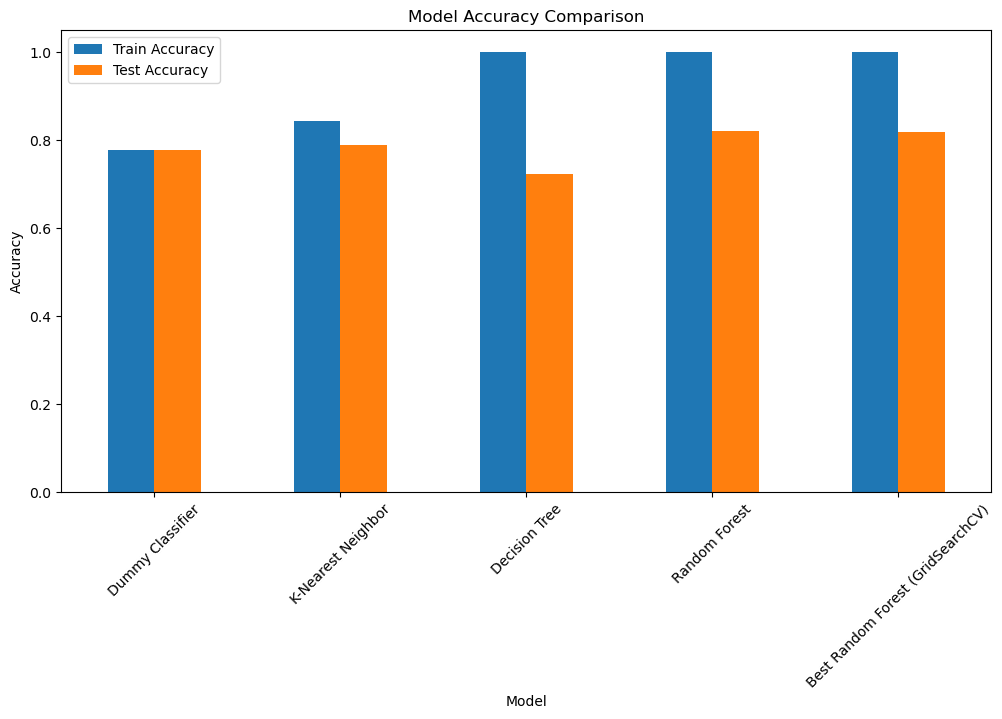

In [10139]:
# Create a DataFrame to display the results

results_df = pd.DataFrame(results)
fig, ax = plt.subplots(figsize=(12, 6))
results_df.plot(kind='bar', x='Model', y=['Train Accuracy', 'Test Accuracy'], ax=ax)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

The best performing model is the Random Forest. We will now dive into Feature Importance to display the constribution of each feature in the prediction.

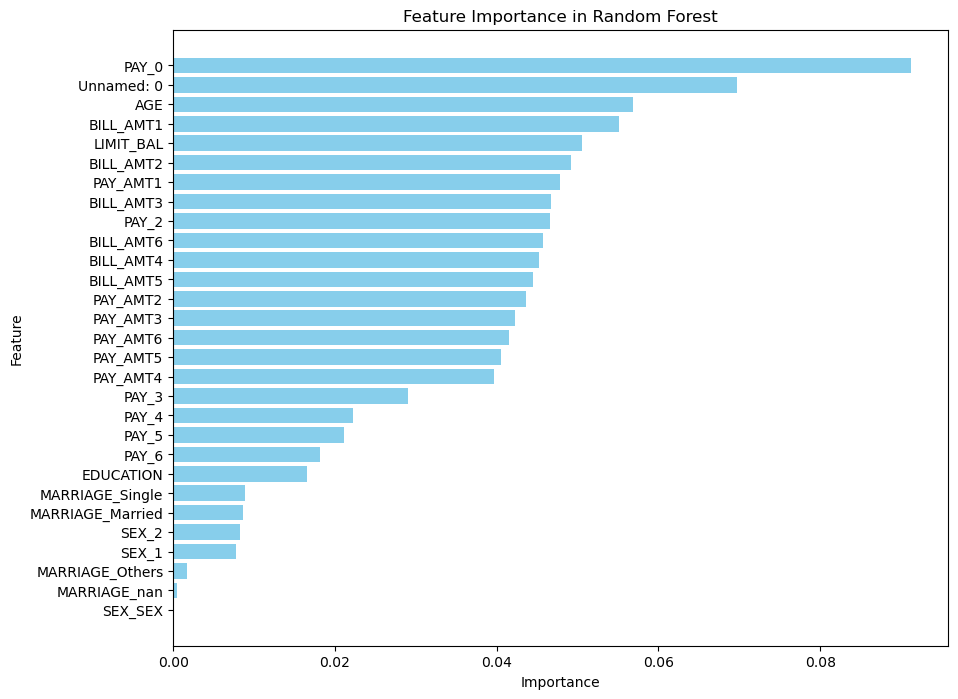

In [10247]:
rf.fit(x_train_scaled, y_train)
importances = rf.feature_importances_
features = x_train.columns

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importances_df = importances_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


### Interpretation notice

Payement delays (PAY_0) is the most important feature. This aligns with the correlation heatmap generated in the EDA.

## Conclusion

### Exploratory Data Anlysis:
- Education levels impacts default. A larger dataset would be required for a more granular view with field of study/majors;
- Test opportunities have been highlidghted for an in-app notification to prevent from default at the end of the monitoring period;
- a policy suggestion has been made to set the maximum payment delay at 6 months;
- a legal opinion is required to include/exclude gender data from the dataset for model training purposes.
- A credit amount maximum value is not expected to address default rate.The dataset provides only an aggregate credit value including both the individual consumer credit and his/her family credit is available. An individual and a group measurement is required to shape product policy.


### Predictive Data Anlysis

The model predicted payment default accurately on unseen data 82% of times.
This result must be screened against regualtory expectations once the Directive has been transposed in domestic law..
